<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/CottonDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!unzip '/content/data_cotton.zip'

Archive:  /content/data_cotton.zip
replace data/val/fresh cotton plant/dsd (327)_iaip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [53]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [54]:
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [55]:
IMAGE_SIZE = [224,224]
train_path = '/content/data/train'
test_path = '/content/data/test'

In [56]:
resnet = ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [57]:
for layer in resnet.layers:
  layer.trainable = False

In [58]:
folders = glob('/content/data/train/*')

In [59]:
x = Flatten()(resnet.output)

In [77]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input,outputs=prediction)

In [78]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [79]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [81]:
training_set = train_datagen.flow_from_directory('/content/data/train',
                                                 target_size = (224,224),
                                                 batch_size=32,
                                                 class_mode='categorical'
                                                 )

Found 1951 images belonging to 4 classes.


In [85]:
# Update test_set to exclude 'test data comp files'
test_set = test_datagen.flow_from_directory(
    '/content/data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']  # Specify only the desired classes
)


Found 18 images belonging to 4 classes.


In [86]:
print(training_set.class_indices)
print(test_set.class_indices)


{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [95]:
# Calculate steps based on batch size
batch_size = 1.1
steps_per_epoch = int(len(training_set) // batch_size)
validation_steps = int(len(test_set) // batch_size)

# Fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 500ms/step - accuracy: 0.7684 - loss: 0.6324 - val_accuracy: 0.7222 - val_loss: 0.7374
Epoch 2/20
 6/55 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7285 - loss: 0.6576

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7291 - loss: 0.6640 - val_accuracy: 0.7778 - val_loss: 0.8163
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.7293 - loss: 0.6520 - val_accuracy: 0.7778 - val_loss: 0.6820
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7767 - loss: 0.6227 - val_accuracy: 0.8333 - val_loss: 0.5189
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 458ms/step - accuracy: 0.7227 - loss: 0.7124 - val_accuracy: 0.7222 - val_loss: 0.6177
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7453 - loss: 0.8162 - val_accuracy: 0.5000 - val_loss: 1.0090
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 486ms/step - accuracy: 0.7423 - loss: 0.7319 - val_accuracy: 0.7222 - val_loss: 0.8761
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7036 - loss: 0.7227 - val_accuracy: 0.7222 - val_loss: 0.9245
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 466ms/step - accuracy: 0.7605 - loss: 0.6326 - val_accuracy: 0.7778 - val_

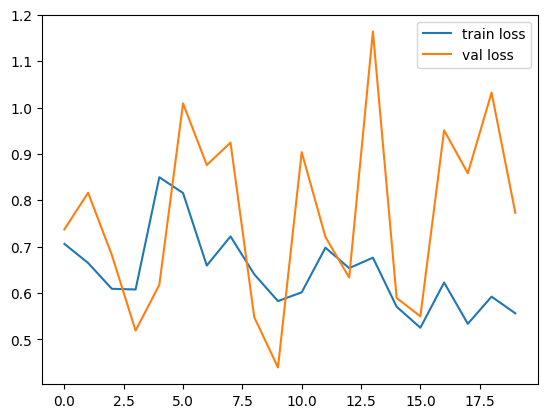

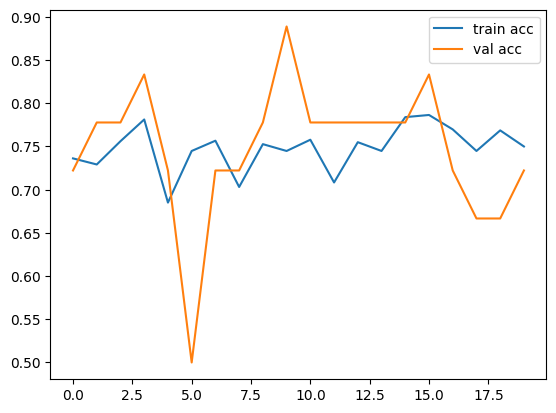

<Figure size 640x480 with 0 Axes>

In [96]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')